In [3]:
import sys 
sys.path.append('/home/manuelbv/netsurf')

""" Let's add our custom netsurf code """
import netsurf

# Glob 
from glob import glob
# os
import os 

Adding /home/manuelbv/netsurf to sys.path
[INFO] - Added fkeras to sys.path from /home/manuelbv/netsurf/fkeras
[INFO] - Added qkeras to sys.path from /home/manuelbv/netsurf/qkeras
[INFO] - Loaded theme: default
                     ▚▗      ▞  ▛▙ 
   𐌍 ↠⌾↞ 𐌃 𐌖 𐌔     ▙ ▙    ▜ ▗▜     
                      ▖ ▘    ▚ ▗▞  

Logging to file: /home/manuelbv/.nodus/nodus_20250324_201705.log


-- Date: 24/Mar/2025
╭───────┬─────────────╮
╰ INFO ─┤ 20:17:05.42 │ - Nodus initialized
        │ 20:17:05.42 │ - Nodus version: 0.1.0
        │ 20:17:05.42 │ - Nodus imported
        │ 20:17:05.42 │ - Jobs imported
        │ 20:17:05.42 │ - JobManager imported
        │ 20:17:05.42 │ - Nodus ready to use


Found config file: /home/manuelbv/.netsurf/config


        │ 20:17:05.65 │ - Created jobs table in NodusDB instance 'netsurf_db'
        │ 20:17:05.65 │ - Created job_dependencies table in NodusDB instance 'netsurf_db'
        │ 20:17:05.65 │ - Added NodusDB instance 'netsurf_db' linked to database 'netsurf_db'


In [ ]:
# Create rootbucket
dir = "/home/manuelbv/netsurf/benchmarks"
name = 'root'
benchmarks = [os.path.basename(d) for d in glob(dir + '/*')]
pruning = [0.0, 0.125, 0.5]
quantizations = ['q<6,0,1>', 'q<6,0,0>', 'q<6,2,1>']
methods = ['bitwise_msb', 'random', 'weight_abs_value', 
                   'hirescam', 'hiresdelta', 'hessian', 'hessiandelta',
                   'qpolar', 'qpolargrad']
# Create root bucket
box = netsurf.core.explorer.create_bucket(dir, name, level = 0, verbose = True,
                                          benchmarks = benchmarks, pruning = pruning,
                                          quantizations = quantizations,
                                          methods = methods) #, pbar = (lambda val, text: (val, text)))

╭───────┼─────────────┤
╰ nets ─┤ 20:17:06.64 │ - Initializing hyperspace global config with the following parameters: <HyperspaceConfig [global]>
	benchmark: ['tinyml_cifar10_resnetv1', 'mnist_lenet5', 'mnist_fnn', 'autompg']
	quantization: ['q<6,0,1>', 'q<6,0,0>', 'q<6,2,1>']
	pruning: [0.0, 0.125, 0.5]
	method: ['bitwise_msb', 'random', 'layerwise_first', 'layerwise_last', 'weight_abs_value', 'hirescam_norm', 'hiresdelta', 'hessian', 'hessiandelta', 'qpolar', 'qpolargrad', 'aiber']
	protection: (0.0, 0.2, 0.4, 0.6, 0.8)
	ber: (0.001, 0.00167, 0.00278, 0.00464, 0.00774, 0.01292, 0.02154, 0.03594, 0.05995, 0.1)
	num_reps: 10
	map_level: {0: 'Root', 1: 'Benchmark', 2: 'Quantization', 3: 'Model', 4: 'Method', 5: 'Experiment'}
	children_prop: {'Root': 'benchmark', 'Benchmark': 'quantization', 'Quantization': 'pruning', 'Pruning': 'method', 'Model': 'method', 'Method': None, 'Experiment': None}
	benchmarks_dir: /asic/projects/NU/netsurf/manuelbv/benchmarks
	datasets_dir: /asic/projects/NU

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


        │ 20:17:11.57 │ - Benchmark object tinyml_cifar10_resnetv1 initialized
╭───────┼─────────────┤
╰ INFO ─┤ 20:17:11.57 │ -       (1/3) - [ModelContainer]: pruned_0.0_resnetv1 @ …/…/…/pruned_0.0_resnetv1
        │ 20:17:11.57 │ -         (1/12) - Method bitwise_msb @ …/…/…/…/bitwise_msb
        │ 20:17:11.57 │ -         (2/12) - Method random @ …/…/…/…/random
        │ 20:17:11.57 │ -         (3/12) - Method layerwise_first @ …/…/…/…/layerwise_first
        │ 20:17:11.57 │ -         (4/12) - Method layerwise_last @ …/…/…/…/layerwise_last
        │ 20:17:11.57 │ -         (5/12) - Method weight_abs_value @ …/…/…/…/weight_abs_value
        │ 20:17:11.57 │ -         (6/12) - Method hirescam_norm @ …/…/…/…/hirescam_norm
        │ 20:17:11.57 │ -         (7/12) - Method hiresdelta @ …/…/…/…/hiresdelta
        │ 20:17:11.57 │ -         (8/12) - Method hessian @ …/…/…/…/hessian
        │ 20:17:11.57 │ -         (9/12) - Method hessiandelta @ …/…/…/…/hessiandelta
        │ 20:17:11.57 │ -

In [19]:
box['autompg']

Benchmark "autompg" @ /home/manuelbv/netsurf/benchmarks/autompg
    ↪ [List: QuantizationContainer]
       ↪ q6_0_1
       ↪ q6_0_0
       ↪ q<6,2,1>

In [24]:
box['autompg']['q<6,2,1>'][0].results.keys()

Index(['protection', 'method', 'true_ber', 'datetime', 'loss',
       'mean_squared_error', 'elapsed_time', 'dataset', 'model_name', 'ber',
       'ranking_method', 'pruning', 'experiment_hash', 'rep', 'model',
       'pruning'],
      dtype='object')

([<Figure size 640x480 with 1 Axes>],
 [<Axes: ylabel='Accuracy'>],
 1,
 [Text(0.5, 0.91, '$\\bf{benchmark}$: autompg  ║  $\\bf{quantization}$: q<6,2,1>\n$\\bf{model}$: 66579_dense64u_qapplyalpha_quantized_relu_dense64u_qapplyalpha_quantized_relu_dense1u')],
 [[<matplotlib.collections.FillBetweenPolyCollection at 0x7efba84b1c60>,
 [{'benchmark': 'autompg',
   'quantization': 'q<6,2,1>',
   'model': '66579_dense64u_qapplyalpha_quantized_relu_dense64u_qapplyalpha_quantized_relu_dense1u'}])

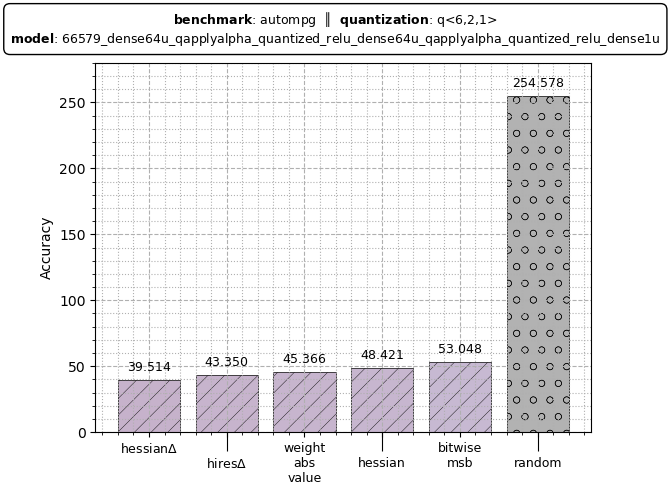

In [21]:
box['autompg']['q<6,2,1>'][0].plot_barplot(metric = 'r2score')

([<Figure size 700x1000 with 1 Axes>],
 [<Axes: ylabel='Accuracy'>],
 1,
 [Text(0.5, 0.91, '$\\bf{benchmark}$: mnist_fnn  ║  $\\bf{quantization}$: q<6,2,1>\n$\\bf{model}$: pruned_0.5_714053_qflatten_dense64u_qapplyalpha_quantized_relu_dense10u_qsoftmax')],
 [[]],
 [{'benchmark': 'mnist_fnn',
   'quantization': 'q<6,2,1>',
   'model': 'pruned_0.5_714053_qflatten_dense64u_qapplyalpha_quantized_relu_dense10u_qsoftmax'}])

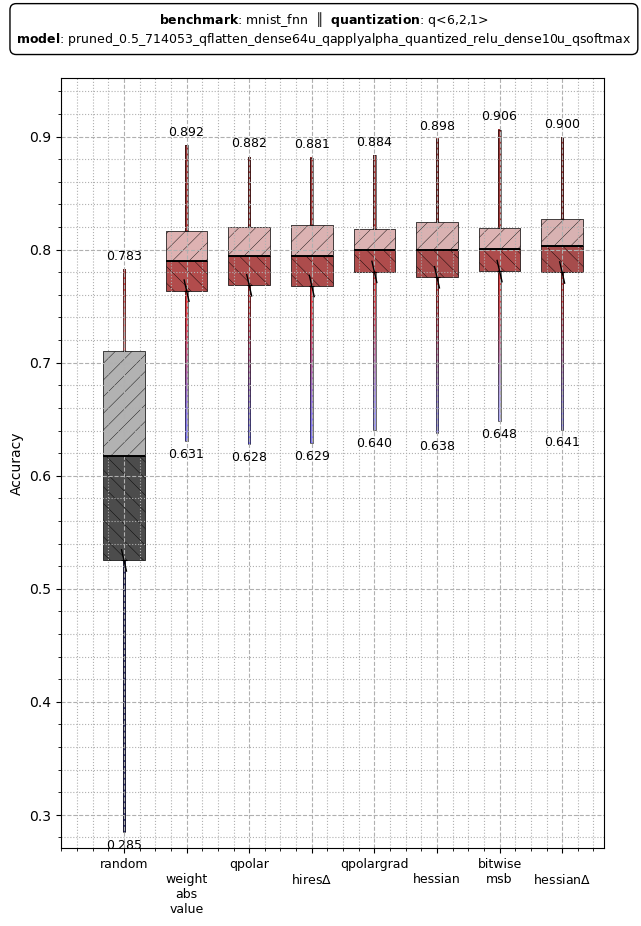

In [18]:
box['mnist_fnn']['q<6,2,1>'][2].plot_boxplot(metric = 'categorical_accuracy')

In [ ]:
exp = box['mnist_fnn']['q<6,0,1>'][1]['bitwise_msb']['config1']

plotter = netsurf.gui.plotter.ExperimentsPlotter(exp.results, metric = 'categorical_accuracy')
# Plot 
plotter.plot_2D_curves(x = 'ber', y = 'mean', hue = 'protection', style = 'protection', ax = None,
                        standalone = True, xlabel = 'Bit Error Rate (%)', ylabel = f'Categorical Accuracy')
# 3D
plotter.plot_3D_volumes(x = 'ber', y = 'mean', z = 'mean', ax = None, 
                            standalone = True, 
                            xlabel = 'Bit Error Rate (%)',
                            zlabel = f'Categorical Accuracy')

In [ ]:
box['mnist_fnn']['q<6,0,1>'][1].plot_barplot()

In [ ]:
box['mnist_fnn']['q<6,0,1>'][1]['QPolar'].plot_2D_curves()

In [ ]:
box['mnist_fnn']['q<6,0,1>'][1]['q']